I'm going to try to build this machine learning model in R using 2 classification algorithms, DNN and LR.
and task 2, using Azure Machine learning designer to apply classification
PS - This is a trying session hence there are bond to be errors.


In [ ]:
# Install R packages
install.packages("tidyverse")
library("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("here")
library("here")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("skimr")
library(skimr)
library(lubridate)
install.packages("janitor")
library(janitor)
install.packages("ggrepel")
library(ggrepel)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
diabetes <- read.csv("diabetes.csv")

In [ ]:
print(diabetes)

    Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1             6     148            72            35       0 33.6
2             1      85            66            29       0 26.6
3             8     183            64             0       0 23.3
4             1      89            66            23      94 28.1
5             0     137            40            35     168 43.1
6             5     116            74             0       0 25.6
7             3      78            50            32      88 31.0
8            10     115             0             0       0 35.3
9             2     197            70            45     543 30.5
10            8     125            96             0       0  0.0
11            4     110            92             0       0 37.6
12           10     168            74             0       0 38.0
13           10     139            80             0       0 27.1
14            1     189            60            23     846 30.1
15            5     166  

In [ ]:
head(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
tail(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
763,9,89,62,0,0,22.5,0.142,33,0
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1
768,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
print(nrow(diabetes))

[1] 768


In [ ]:
print(ncol(diabetes))

[1] 9


In [ ]:
summary(diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [ ]:
mean(diabetes$SkinThickness.R)

Warning message in mean.default(diabetes$SkinThickness.R):
“argument is not numeric or logical: returning NA”


[1] NA

In [ ]:
suppressWarnings(suppressMessages)

function (expr, classes = "message") 
withCallingHandlers(expr, message = function(c) if (inherits(c, 
    classes)) tryInvokeRestart("muffleMessage"))
<bytecode: 0x560dec7c9070>
<environment: namespace:base>

In [ ]:
mean(diabetes$Age.R)

Warning message in mean.default(diabetes$Age.R):
“argument is not numeric or logical: returning NA”


[1] NA

In [ ]:
#preview and check datasets
diabetes <-diabetes %>%
  distinct() %>%
  drop_na()
n_unique(diabetes$id)

[1] 0

In [ ]:
sum(duplicated(diabetes))

[1] 0

[1] "check duplicate"


             1          2          3          4          5          6
2    66.910957                                                       
3    54.296335 102.523134                                            
4   115.734444  94.817107 135.644001                                 
5   172.589133 178.667294 180.556505  94.739108                      
6    52.145771  43.405328  67.886021 101.297834 177.176764           
7   117.170404  90.040939 141.807862  23.074154 100.987978 104.106495
8    89.213973  79.105860  94.224675 120.804971 178.088404  74.813732
9   545.333687 555.127235 545.559441 463.461714 381.827575 551.374657
10   58.984032  68.026276  73.587252 116.144799 187.338830  42.501305
11   59.077831  47.676258  79.616087 103.258174 181.501095  22.472207
12   43.822005  89.526502  23.433058 126.566769 178.033918  53.850468
13   38.456633  68.639916  53.263790 115.933701 178.848308  36.370147
14  847.232732 852.878217 846.830157 759.597955 681.015104 850.087224
15  176.827152 194.2

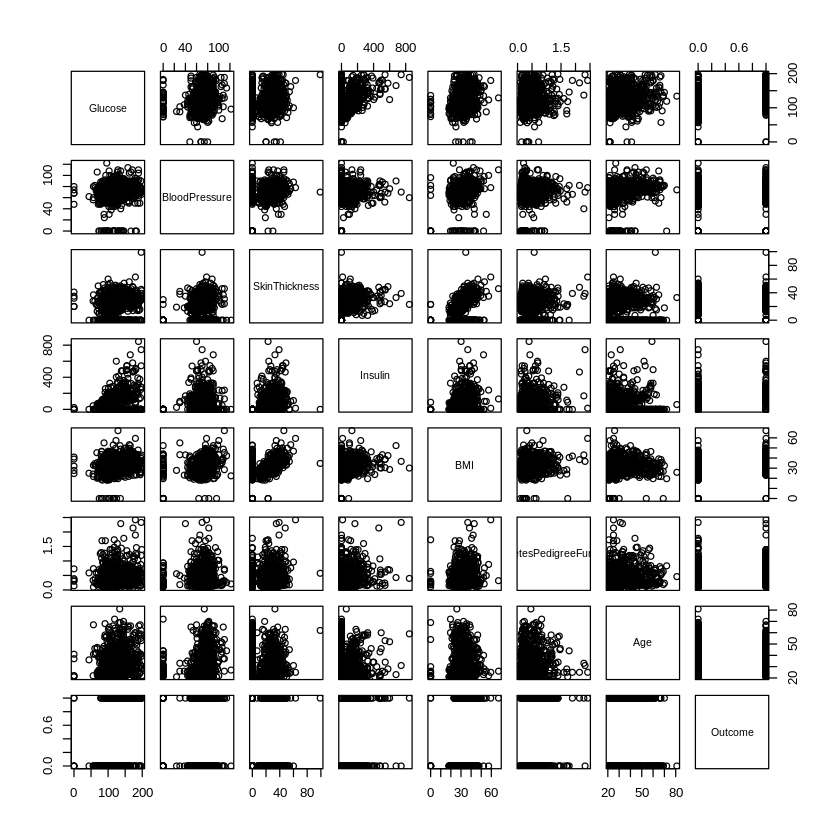

In [ ]:
#check datasets
print("check duplicate")
dist(diabetes)
pairs.default(diabetes[-1])

In [ ]:
#Visualize the dataset as a table
diabetes %>%
  head(6) %>%
  knitr::kable()



| Pregnancies| Glucose| BloodPressure| SkinThickness| Insulin|  BMI| DiabetesPedigreeFunction| Age| Outcome|
|-----------:|-------:|-------------:|-------------:|-------:|----:|------------------------:|---:|-------:|
|           6|     148|            72|            35|       0| 33.6|                    0.627|  50|       1|
|           1|      85|            66|            29|       0| 26.6|                    0.351|  31|       0|
|           8|     183|            64|             0|       0| 23.3|                    0.672|  32|       1|
|           1|      89|            66|            23|      94| 28.1|                    0.167|  21|       0|
|           0|     137|            40|            35|     168| 43.1|                    2.288|  33|       1|
|           5|     116|            74|             0|       0| 25.6|                    0.201|  30|       0|

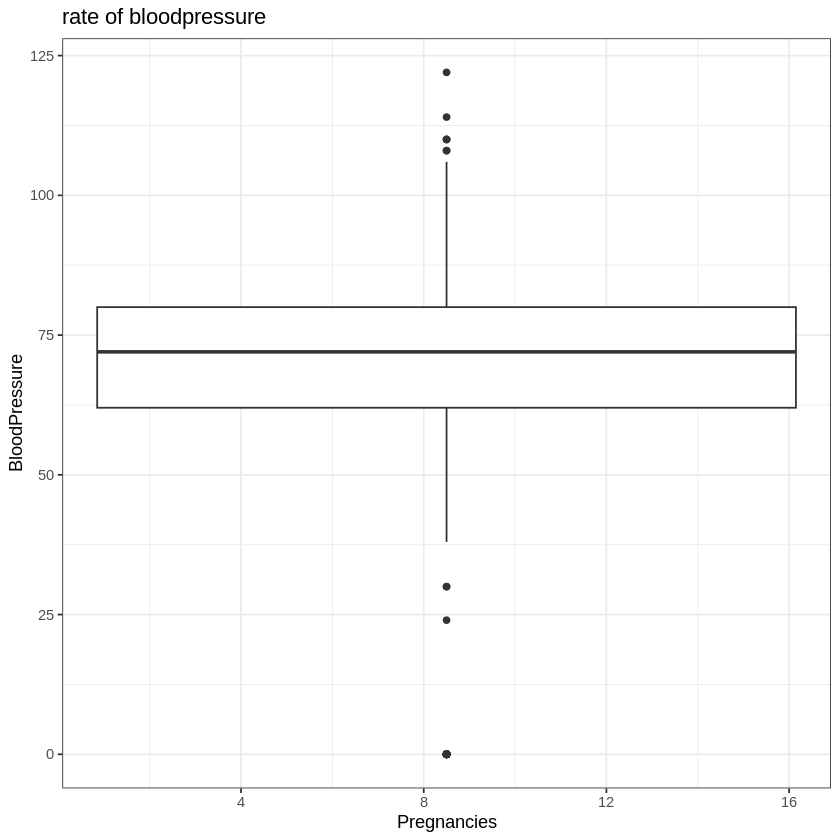

In [ ]:
ggplot(data= diabetes, aes(x=Pregnancies, y=BloodPressure, group=1)) +
  geom_boxplot() +theme_bw() +
  ggtitle("rate of bloodpressure")

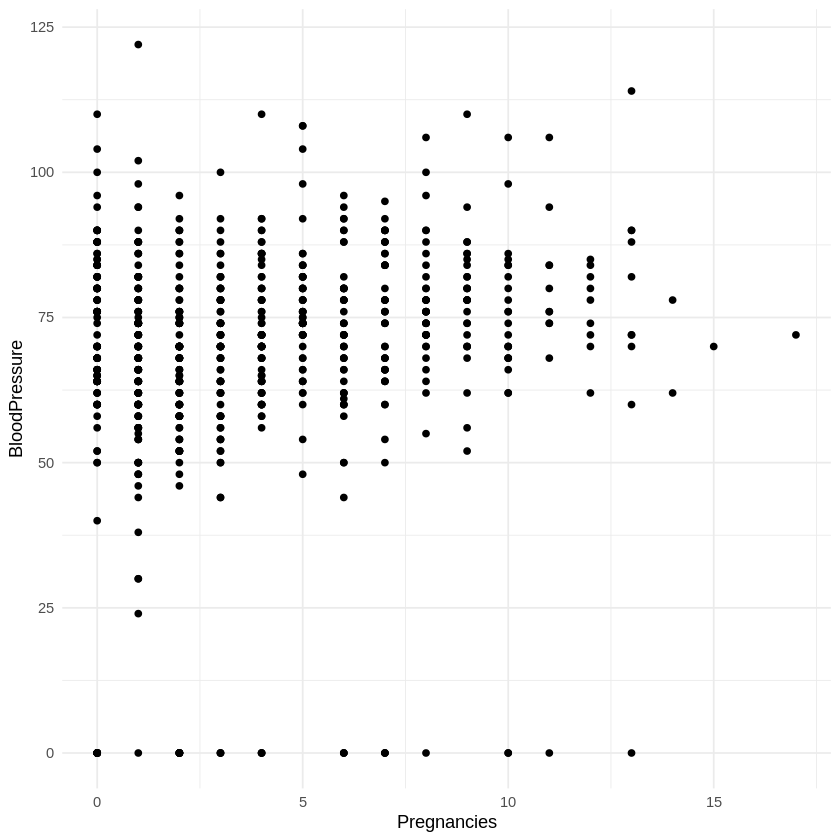

In [ ]:
# Create a scatter basic plot

 ggplot(data = diabetes, aes(x = Pregnancies, y = BloodPressure)) +
            geom_point()  + theme_minimal()




Install and load the neural packages and train and test the datasets

In [ ]:
#Loading libraries for DNN
install.packages("keras")
library(keras)
install.packages("mlbench")
library(mlbench)
install.packages("magrittr")
library(magrittr)
install.packages("neuralnet")
library(neuralnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [ ]:
diabetes %<>% mutate_if(is.factor, as.numeric)
str(diabetes)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [ ]:
#fitting the model

nn=neuralnet(Outcome~Pregnancies+Glucose+BloodPressure+Insulin+BMI+DiabetesPedigreeFunction+Age,data=diabetes, hidden=3,act.fct = "logistic",

             linear.output = FALSE)


Warning message:
“Algorithm did not converge in 1 of 1 repetition(s) within the stepmax.”


In [ ]:
#creating testing set
Pregnancies = c(6,8,0)
Glucose = c(148,183,137)
BloodPressure = c(72,64,40)
Insulin = c(0,0,168)
BMI = c(33.6,23.3,43.1)
DiabetesPedigreeFunction = c(0.627,0.672,2.288)
Age = c(50,32,33)
test=data.frame(Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age)

In [ ]:
#prediction
predict=compute(nn,test)
predict$net.result

probab<- predict$net.result

ERROR: ignored

In [ ]:
#converting probabilities into 1 and 0
pre <- ifelse(probab>0.5, 1, 0)
pre

ERROR: ignored

In [ ]:
#Train-test split
train_test_split_index <- 0.8 * nrow(diabetes)

In [ ]:
train <- diabetes[1:train_test_split_index,]
head(train)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
test <- diabetes[(train_test_split_index+1): nrow(diabetes),]
head(test)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
615,11,138,74,26,144,36.1,0.557,50,1
616,3,106,72,0,0,25.8,0.207,27,0
617,6,117,96,0,0,28.7,0.157,30,0
618,2,68,62,13,15,20.1,0.257,23,0
619,9,112,82,24,0,28.2,1.282,50,1
620,0,119,0,0,0,32.4,0.141,24,1


In [ ]:
show_train_set.N = 10

In [ ]:
if (is.null(y_train)) {
  y_train <- c(1, 2, 3, 4, 5)  # Replace with your own values
}
dim(y_train) <- c(length(y_train), 1)


Preprocessing

In [ ]:
X_train <- scale(train[, c(1:2)])

y_train <- "Outcome"
dim(y_train) <- c("Outcome") # add extra dimension to vector

X_test <- scale(test[, c(1:2)])

y_test <- test$y
dim(y_test) <- c(length(y_test), 1) # add extra dimension to vector

Warning message in dim(y_train) <- c("Outcome"):
“NAs introduced by coercion”


ERROR: ignored

In [ ]:
if (is.null(y_train)) {
  y_train <- c("Outcome")  # Replace with your own values
}
dim(y_train) <- c(length(y_train), 1)


In [ ]:
X_train <- as.matrix(X_train, byrow=TRUE)
X_train <- t(X_train)
y_train <- as.matrix(y_train, byrow=TRUE)
y_train <- t(y_train)

X_test <- as.matrix(X_test, byrow=TRUE)
X_test <- t(X_test)
y_test <- as.matrix(y_test, byrow=TRUE)
y_test <- t(y_test)

ERROR: ignored